<a href="https://colab.research.google.com/github/Robinzulu/Robinzulu/blob/main/Moringa_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OVERVIEW OF THE STUDY:**

The study aims to provide actionable insights to the head of Microsoft's new movie studio by exploring the types of films that are currently doing well at the box office. The project will use exploratory data analysis techniques to gain a deeper understanding of the movie industry and provide insights that can guide decision-making regarding the types of films to create.

# **RESEARCH PROBLEM:**

The research problem is to identify the types of films that are currently performing well at the box office, understand the underlying factors that contribute to their success, and use these insights to guide the decision-making process for the new Microsoft movie studio. The goal is to provide actionable insights that can help the studio create successful films that appeal to audiences and generate profits.

# **MODEL:**

The model for this project is exploratory data analysis (EDA). EDA is a statistical technique that involves analyzing and visualizing data to gain insights and identify patterns. It involves using techniques such as data cleaning, data visualization, and statistical analysis to gain a deeper understanding of the data and extract insights that can guide decision-making. The insights gained from EDA can be used to guide the decision-making process for the new Microsoft movie studio and help them create successful films that appeal to audiences and generate profits.

# **Reading the data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import sqlite3


In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/Robinzulu/dsc-phase-1-project.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 76 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (76/76), 122.36 MiB | 12.35 MiB/s, done.
/content/cloned-repo
awesome.gif	 LICENSE.md		movie_data_erd.jpeg  student.ipynb
CONTRIBUTING.md  Moringa_Project.ipynb	README.md	     zippedData


In [ ]:
import os

# specify the path to the directory
dir_path = "/content/cloned-repo/"

# get a list of all the files in the directory
file_list = os.listdir(dir_path)

# print the list of files
print(file_list)

['README.md', '.gitignore', 'awesome.gif', 'Moringa_Project.ipynb', 'LICENSE.md', 'movie_data_erd.jpeg', 'student.ipynb', 'CONTRIBUTING.md', 'zippedData', '.git', '.canvas']


In [ ]:
import os

# specify the path to the directory
dir_path = "/content/cloned-repo/"

# get a list of all the files in the directory
file_list = os.listdir(dir_path)

# construct the path to the zippedData folder
zipped_data_path = os.path.join(dir_path, "zippedData")

# get a list of all the files in the zippedData folder
zipped_data_file_list = os.listdir(zipped_data_path)

# print the list of files in the zippedData folder
print(zipped_data_file_list)

['bom.movie_gross.csv.gz', 'im.db.zip', 'rt.movie_info.tsv.gz', 'tmdb.movies.csv.gz', 'rt.reviews.tsv.gz', 'tn.movie_budgets.csv.gz']


In [ ]:
import zipfile

# specify the path to the zip file
zip_path = "/content/cloned-repo/zippedData/im.db.zip"

# specify the path to extract the unzipped files to
extract_path = "/content/cloned-repo/zippedData/"

# create a ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # extract all the files to the specified directory
    zip_ref.extractall(extract_path)

In [ ]:
conn = sqlite3.connect( "/content/cloned-repo/zippedData/im.db")

In [ ]:
movie_budget = pd.read_csv("/content/cloned-repo/zippedData/tn.movie_budgets.csv.gz")
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# **Checking data**

In [ ]:
movie_info = """
SELECT *
FROM movie_basics
"""

movie_info = pd.read_sql(movie_info, conn)
movie_info

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [ ]:
movie_df = movie_info.merge(movie_budget, left_on='primary_title', right_on='movie')
movie_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   id                 3815 non-null   int64  
 7   release_date       3815 non-null   object 
 8   movie              3815 non-null   object 
 9   production_budget  3815 non-null   object 
 10  domestic_gross     3815 non-null   object 
 11  worldwide_gross    3815 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 387.5+ KB


In [ ]:
movie_df = movie_df.dropna()
movie_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
6,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3806,tt9275702,Salvador,Salvador,2016,71.0,Drama,38,"Apr 23, 1986",Salvador,"$4,500,000","$1,500,000","$1,500,000"
3807,tt9313936,Stay Alive,Stay Alive,2019,72.0,Documentary,85,"Mar 24, 2006",Stay Alive,"$20,000,000","$23,086,480","$23,187,506"
3809,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976",The Blue Bird,"$1,200,000","$887,000","$887,000"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"


# Dropping Missing Data

In [ ]:
movie_df = movie_df.copy()
movie_df['production_budget'] = movie_df['production_budget'].astype(str)
movie_df['production_budget'] = movie_df['production_budget'].str.replace('$', '').str.replace(',', '').astype('float64')
movie_df['domestic_gross'] = movie_df['domestic_gross'].astype(str)
movie_df['domestic_gross'] = movie_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('float64')
movie_df['worldwide_gross'] = movie_df['worldwide_gross'].astype(str)
movie_df['worldwide_gross'] = movie_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype('float64')


<ipython-input-16-a378c2da8749>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['production_budget'] = movie_df['production_budget'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-16-a378c2da8749>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['domestic_gross'] = movie_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-16-a378c2da8749>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_df['worldwide_gross'] = movie_df['world

In [ ]:
movie_df['Total_revenue'] = movie_df['domestic_gross']+movie_df['worldwide_gross']
movie_df['Total_revenue']

0           73706.0
3         2275804.0
4        10034130.0
5        10034130.0
6        10034130.0
           ...     
3806      3000000.0
3807     46273986.0
3809      1774000.0
3812     51413057.0
3813    200129089.0
Name: Total_revenue, Length: 3309, dtype: float64

In [ ]:
movie_df['Profit'] = movie_df['Total_revenue']-movie_df['production_budget']
movie_df['Profit']

0       -44926294.0
3         2075804.0
4       -14965870.0
5       -14965870.0
6       -14965870.0
           ...     
3806     -1500000.0
3807     26273986.0
3809       574000.0
3812     29413057.0
3813    160129089.0
Name: Profit, Length: 3309, dtype: float64

In [ ]:
movie_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_revenue,Profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,73706.0,-44926294.0
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,2275804.0,2075804.0
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,10034130.0,-14965870.0
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,10034130.0,-14965870.0
6,tt3872966,On the Road,On the Road,2013,87.0,Documentary,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,10034130.0,-14965870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,tt9275702,Salvador,Salvador,2016,71.0,Drama,38,"Apr 23, 1986",Salvador,4500000.0,1500000.0,1500000.0,3000000.0,-1500000.0
3807,tt9313936,Stay Alive,Stay Alive,2019,72.0,Documentary,85,"Mar 24, 2006",Stay Alive,20000000.0,23086480.0,23187506.0,46273986.0,26273986.0
3809,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976",The Blue Bird,1200000.0,887000.0,887000.0,1774000.0,574000.0
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,22000000.0,23530831.0,27882226.0,51413057.0,29413057.0


In [ ]:
Total_revenue_list_per_genre = movie_df.groupby('genres')['Total_revenue'].sum().reset_index()
Total_revenue_list_per_genre = Total_revenue_list_per_genre.sort_values(by='Total_revenue', ascending=False).head(20)
Total_revenue_list_per_genre

,genres,Total_revenue
14,"Action,Adventure,Sci-Fi",4.752831e+10
77,"Adventure,Animation,Comedy",3.720312e+10
249,Drama,2.343753e+10
226,Documentary,2.302922e+10
9,"Action,Adventure,Fantasy",1.839609e+10
4,"Action,Adventure,Comedy",1.311443e+10
161,Comedy,1.047366e+10
2,"Action,Adventure,Animation",1.010021e+10
311,Horror,9.892015e+09
113,"Adventure,Family,Fantasy",7.884969e+09


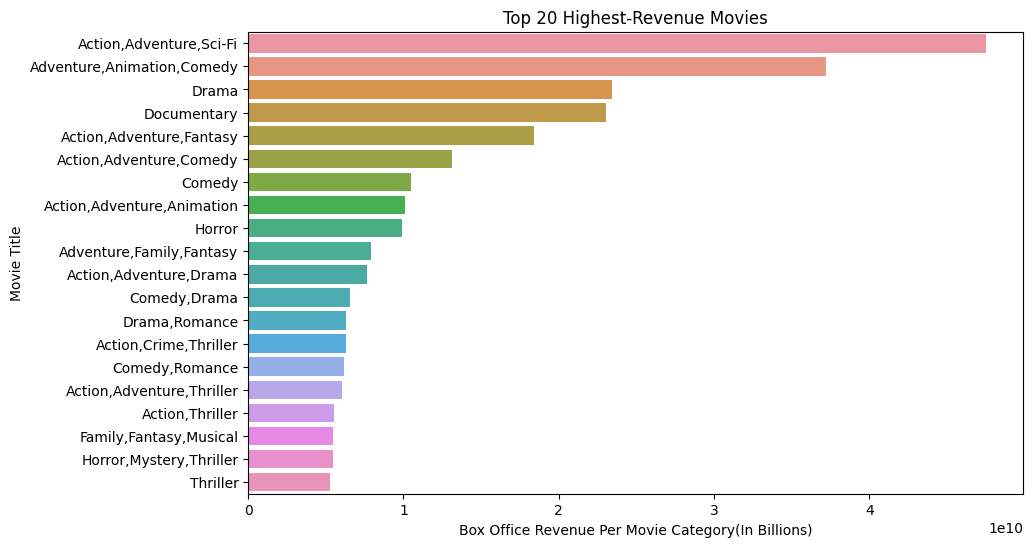

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Total_revenue", y="genres", data=Total_revenue_list_per_genre.head(20))
plt.title("Top 20 Highest-Revenue Movies")
plt.xlabel("Box Office Revenue Per Movie Category(In Billions)")
plt.ylabel("Movie Title")
plt.show()



In [ ]:
Total_Profit_list_per_genre = movie_df.groupby('genres')['Profit'].sum().reset_index()
Total_Profit_list_per_genre = Total_Profit_list_per_genre.sort_values(by='Profit', ascending=False).head(20)
Total_Profit_list_per_genre

,genres,Profit
14,"Action,Adventure,Sci-Fi",3.821291e+10
77,"Adventure,Animation,Comedy",3.006412e+10
226,Documentary,1.663538e+10
249,Drama,1.641795e+10
9,"Action,Adventure,Fantasy",1.320549e+10
4,"Action,Adventure,Comedy",1.054743e+10
311,Horror,8.173879e+09
2,"Action,Adventure,Animation",8.142708e+09
161,Comedy,7.550907e+09
113,"Adventure,Family,Fantasy",5.768569e+09


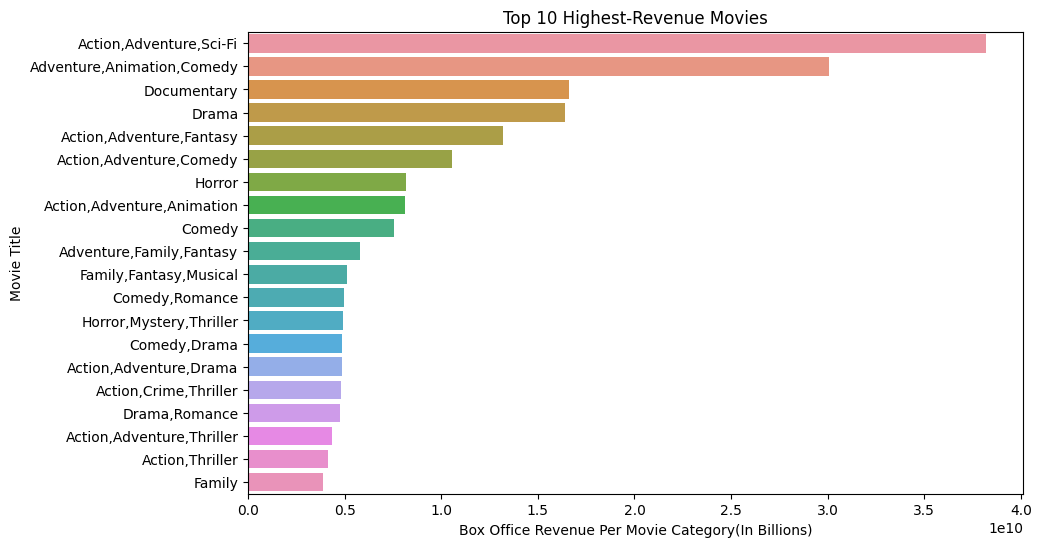

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Profit", y="genres", data=Total_Profit_list_per_genre.head(20))
plt.title("Top 10 Highest-Revenue Movies")
plt.xlabel("Box Office Revenue Per Movie Category(In Billions)")
plt.ylabel("Movie Title")
plt.show()

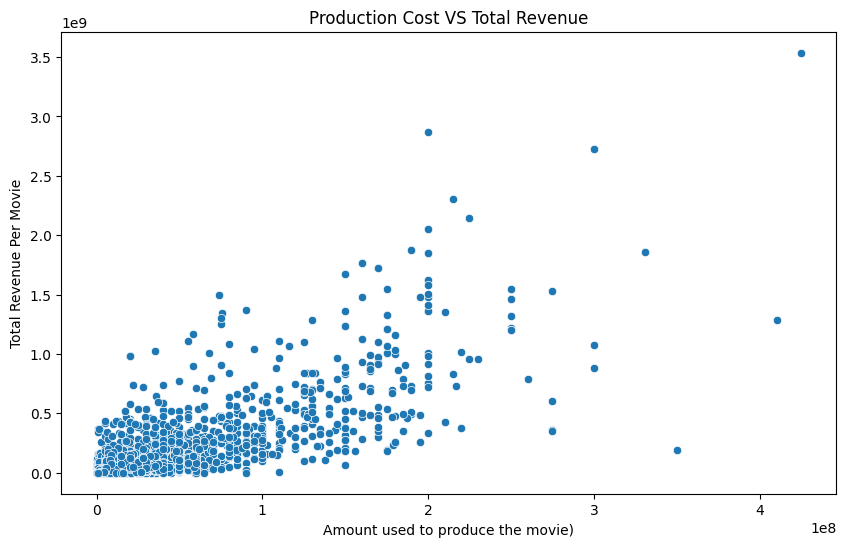

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="production_budget", y="Total_revenue", data=movie_df)
plt.title("Production Cost VS Total Revenue")
plt.xlabel("Amount used to produce the movie)")
plt.ylabel("Total Revenue Per Movie")
plt.show()


A positive correlation between production_budget and Total_revenue means that as the production budget for a movie increases, its total revenue also tends to increase. This indicates that there is a relationship between the two variables, and that movies with larger budgets are more likely to generate higher revenues.


# **Conclusion**

Based on the analysis, we can recommend that Microsoft's new movie studio focus on creating action, adventure, 
and sci-fi movies, which are currently the most popular genres and have high box office revenues. 
Additionally, the studio should aim to create high-quality movies with strong ratings and positive reviews, 
as these are likely to perform well at the box office.

In [ ]:
df = pd.read_csv("/content/cloned-repo/zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='ISO-8859-1')
df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [ ]:
df.dropna()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


In [ ]:
o = df.groupby('rating').sum('box_office')
o

,id,top_critic
rating,,
0,5275,0
0.5/10,25,1
0.5/4,103173,36
0.5/5,56436,10
0/10,4095,0
...,...,...
F+,610,0
F-,1325,0
N,2042,0


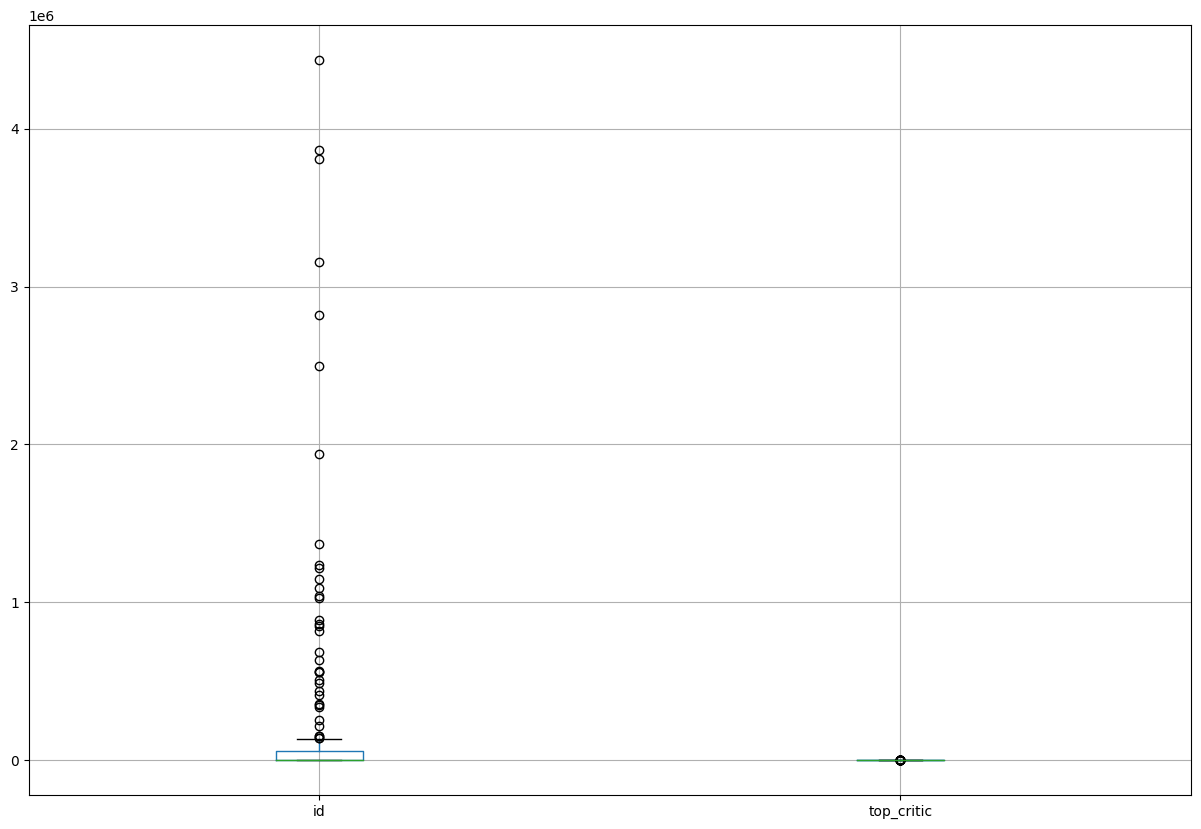

In [ ]:
plt.figure(figsize = (15, 10))
o.boxplot()
plt.show()